~/data/volume_2/observational/raw/era5_sst_1959-2021_1_12_daily_2.0deg.nc
sorting latitude
applying rolling mean, beware: memory intensive
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years

Visual test latlon -28 -40


writing ncdf file to:
~/data/volume_2/observational/preprocessed/era5_sst_1959-2021_1_12_daily_2.0deg.nc


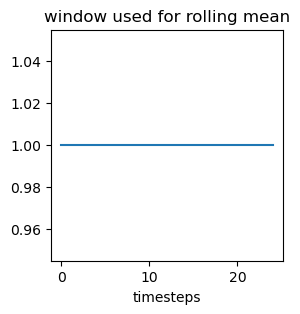

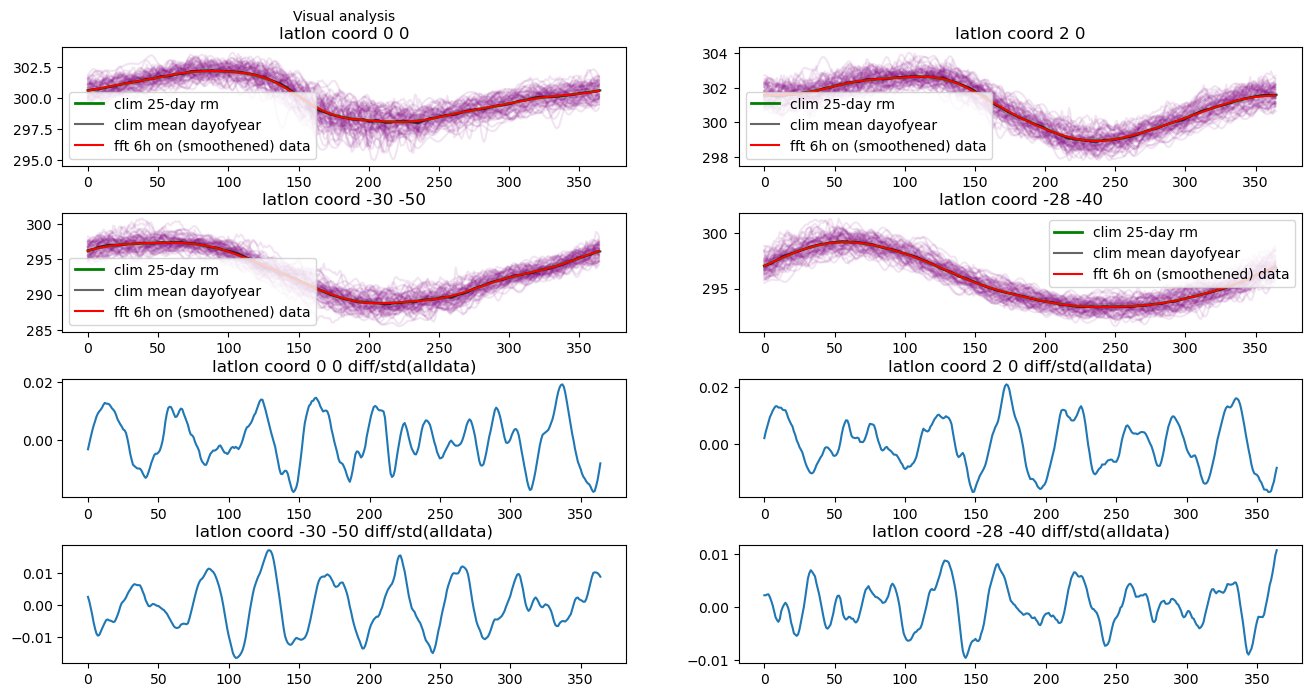

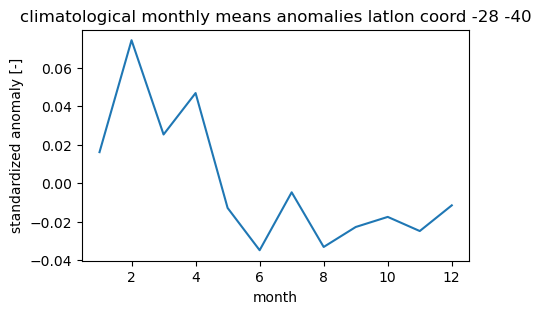

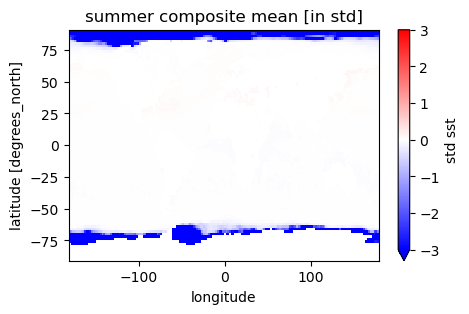

In [3]:
import os
import preprocessing as pp
import utils

path_obs_data = '~/data/volume_2/observational/'
all_infiles = ['era5_sst_1959-2021_1_12_daily_2.0deg.nc',
               'en4_salinity_5m_1950-2021_1_12_monthly_1.0deg.nc',
               'era5_olr_1950_2021_daily_1deg_tropics.nc',
               'era5_t_850hpa_1959-2021_1_12_daily_2.0deg.nc',
               'era5_t2m_1959-2021_1_12_daily_2.0deg.nc',
               'era5_z_200hpa_500hpa_1959-2021_1_12_daily_2.0deg.nc',
               'gleam_E_1980-2021_daily_1.0deg_65S-65N.nc',
               'gleam_smsurface_1980-2021_daily_1.0deg_65S-65N.nc',
               'gleam_SMroot_1980-2021_daily_1.0deg_65S-65N.nc']

i_file = 0
infile = os.path.join(path_obs_data, 'raw', all_infiles[i_file])
print(infile)

outfile = os.path.join(path_obs_data, 'preprocessed', all_infiles[i_file])

ds = pp.import_ds_lazy(infile, start_end_year=None, format_lon='east_west',
                      kwrgs_NaN_handling = {'missing_data_ts_to_nan':True})

pp.detrend_anom_ncdf3D(ds, outfile, loadleap=False, detrend=False, anomaly=True,
                        apply_fft=True, n_harmonics=6, encoding={})